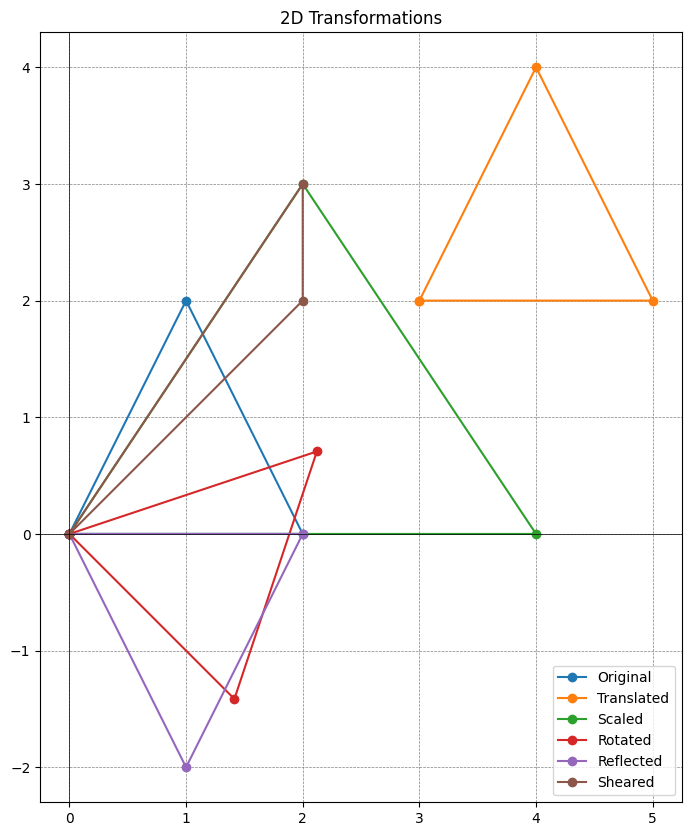

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D object (e.g., a triangle)
object_points = np.array([
    [0, 0],  # Point A
    [2, 0],  # Point B
    [1, 2],  # Point C
    [0, 0]   # Closing the shape
])

# Transformation Functions
def translate(points, tx, ty):
    """Apply translation by (tx, ty)."""
    translation_matrix = np.array([tx, ty])
    return points + translation_matrix

def scale(points, sx, sy):
    """Apply scaling by (sx, sy)."""
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    return np.dot(points, scaling_matrix)

def rotate(points, angle):
    """Apply rotation by 'angle' degrees."""
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return np.dot(points, rotation_matrix)

def reflect(points, axis):
    """Apply reflection across x-axis, y-axis, or origin."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0], [0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0], [0, -1]])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    return np.dot(points, reflection_matrix)

def shear(points, shx, shy):
    """Apply shearing with factors (shx, shy)."""
    shearing_matrix = np.array([[1, shx], [shy, 1]])
    return np.dot(points, shearing_matrix)


# Example Transformations
translated_points = translate(object_points, 3, 2)
scaled_points = scale(object_points, 2, 1.5)
rotated_points = rotate(object_points, 45)
reflected_points = reflect(object_points, axis='x')
sheared_points = shear(object_points, shx=1, shy=0.5)



# Plot the transformations
plt.figure(figsize=(10, 10))

# Original Object
plt.plot(object_points[:, 0], object_points[:, 1], label='Original', marker='o')

# Individual Transformations
plt.plot(translated_points[:, 0], translated_points[:, 1], label='Translated', marker='o')
plt.plot(scaled_points[:, 0], scaled_points[:, 1], label='Scaled', marker='o')
plt.plot(rotated_points[:, 0], rotated_points[:, 1], label='Rotated', marker='o')
plt.plot(reflected_points[:, 0], reflected_points[:, 1], label='Reflected', marker='o')
plt.plot(sheared_points[:, 0], sheared_points[:, 1], label='Sheared', marker='o')



# Add grid and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title("2D Transformations")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


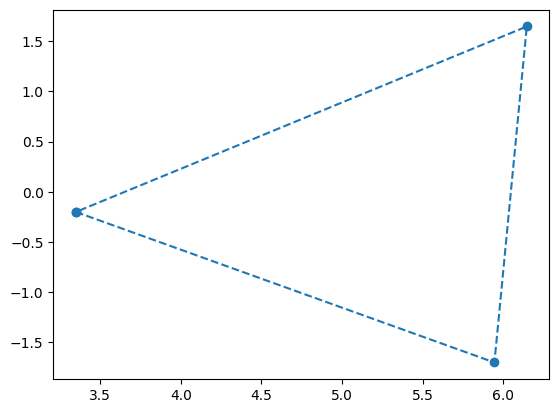

In [2]:
def composite_transform(points, transformations):
    """Apply a series of transformations in order."""
    result = points
    for transform, args in transformations:
        result = transform(result, *args)
    return result
# Composite Transformation: Translate -> Scale -> Rotate
composite_points = composite_transform(object_points, [
    (translate, (2, 1)),
    (scale, (1.5, 1.5)),
    (rotate, (30,))
])
    # Composite Transformation
plt.plot(composite_points[:, 0], composite_points[:, 1], label='Composite', marker='o', linestyle='--')


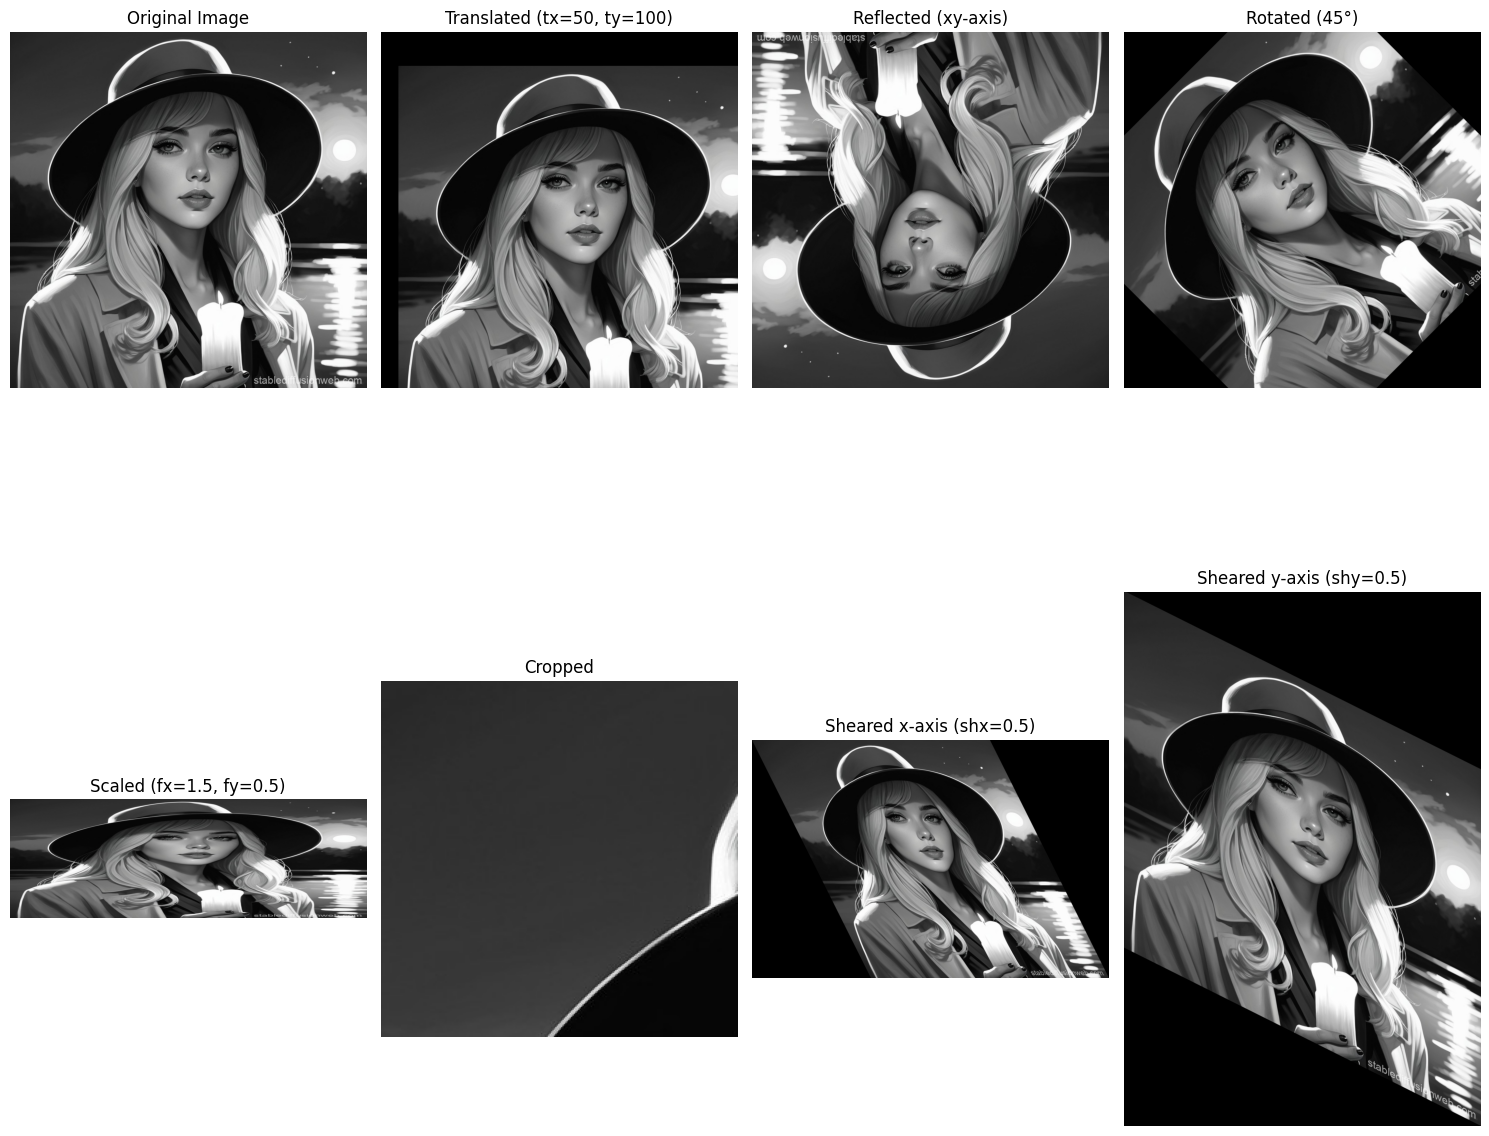

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and display images
def show_subplots(images, titles, rows, cols, figsize=(15, 15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()  # Flatten the 2D grid into a 1D array
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Load the image
image_path = "/content/LadyPic.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    return translated_img

translated_image = translate_image(image, 50, 100)

# 2. Reflection
def reflect_image(img, axis):
    if axis == 'x':  # Reflect along x-axis
        reflected_img = cv2.flip(img, 0)
    elif axis == 'y':  # Reflect along y-axis
        reflected_img = cv2.flip(img, 1)
    elif axis == 'xy':  # Reflect along both axes
        reflected_img = cv2.flip(img, -1)
    else:
        raise ValueError("Invalid axis. Use 'x', 'y', or 'xy'.")
    return reflected_img

reflected_image = reflect_image(image, 'xy')

# 3. Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img

rotated_image = rotate_image(image, 45)

# 4. Scaling
def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_img

scaled_image = scale_image(image, 1.5, 0.5)

# 5. Cropping
def crop_image(img, x_start, y_start, x_end, y_end):
    cropped_img = img[y_start:y_end, x_start:x_end]
    return cropped_img

cropped_image = crop_image(image, 50, 50, 300, 300)

# 6. Shearing in x-axis
def shear_image_x(img, shx):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols + int(rows * shx), rows))
    return sheared_img

sheared_image_x = shear_image_x(image, 0.5)

# 7. Shearing in y-axis
def shear_image_y(img, shy):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols, rows + int(cols * shy)))
    return sheared_img

sheared_image_y = shear_image_y(image, 0.5)

# Prepare images and titles for subplots
images = [
    image, translated_image, reflected_image,
    rotated_image, scaled_image, cropped_image,
    sheared_image_x, sheared_image_y
]
titles = [
    "Original Image", "Translated (tx=50, ty=100)", "Reflected (xy-axis)",
    "Rotated (45°)", "Scaled (fx=1.5, fy=0.5)", "Cropped",
    "Sheared x-axis (shx=0.5)", "Sheared y-axis (shy=0.5)"
]

# Display all transformations in subplots
show_subplots(images, titles, rows=2, cols=4)